In [7]:
! pip install chembl_webresource_client
! pip install rdkit-pypi

  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Not uninstalling attrs at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'attrs'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Planning

- Acquire HIV Targets Data from ChEMBL Database
- This project will adress single proteins only (protein complexes would require much more code than is possible in this weekend to process -> express this in the video)
- We had to filter out all non-single protein targets from the database in order to prevent complex organisms or proteins to appear in the list.

## Imports

In [22]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

## Finding HIV Target Proteins and Assays

In [5]:
# Target search for HIV
target = new_client.target
target_query = target.search('HIV')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Human immunodeficiency virus,HIV protease,19.0,False,CHEMBL3638323,"[{'accession': 'Q9YQ30', 'component_descriptio...",SINGLE PROTEIN,12721
1,[],HIV-1 M:B_Lai,HIV-1 M:B_Lai,15.0,False,CHEMBL612775,[],ORGANISM,290579
2,[],Homo sapiens,Transcription factor HIVEP2,12.0,False,CHEMBL4523214,"[{'accession': 'P31629', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,Ubiquitin thioesterase OTU1,12.0,False,CHEMBL4630833,"[{'accession': 'Q5VVQ6', 'component_descriptio...",SINGLE PROTEIN,9606
4,"[{'xref_id': 'P51681', 'xref_name': None, 'xre...",Homo sapiens,C-C chemokine receptor type 5,11.0,False,CHEMBL274,"[{'accession': 'P51681', 'component_descriptio...",SINGLE PROTEIN,9606
5,"[{'xref_id': 'P15822', 'xref_name': None, 'xre...",Homo sapiens,Human immunodeficiency virus type I enhancer-b...,9.0,False,CHEMBL2909,"[{'accession': 'P15822', 'component_descriptio...",SINGLE PROTEIN,9606
6,"[{'xref_id': 'Q92993', 'xref_name': None, 'xre...",Homo sapiens,Histone acetyltransferase KAT5,9.0,False,CHEMBL5750,"[{'accession': 'Q92993', 'component_descriptio...",SINGLE PROTEIN,9606
7,[],Homo sapiens,CCR5/mu opioid receptor complex,9.0,False,CHEMBL3301384,"[{'accession': 'P51681', 'component_descriptio...",PROTEIN COMPLEX,9606
8,[],Homo sapiens,Zinc finger and BTB domain-containing protein 7A,7.0,False,CHEMBL5069375,"[{'accession': 'O95365', 'component_descriptio...",SINGLE PROTEIN,9606
9,[],Homo sapiens,80S Ribosome,0.0,False,CHEMBL3987582,"[{'accession': 'P08865', 'component_descriptio...",PROTEIN NUCLEIC-ACID COMPLEX,9606


We chose target 0, 4, and 6 (HIV protease, C-C chemokine receptor type 5, and Histone acetyltransferase KAT5) due to the diverse ways they cause HIV proliferation. HIV Protease helps cut large viral precursor polypeptides into smaller functional proteins necessary for HIV to mature and increase its infectiveness. C-C chemokine receptor type 5 (CCR5) is a co-receptor used by the HIV virus to gain entry into cells. Histone acetyltransferase KAT5 has the role of gene expression regulation and is able to enhance viral gene expression (by binding to the promoter regions of viruses), contributing to viral replication and the production of new infectious virions for HIV.

Picking a standard bioactivity unit type (IC50, here) makes it so that the drugs that address each target behave in a standardized way, allowing them to be compared easily and evaluated in the same ML algorithms. In each dataframe, the standard value property shows how potent an assay is at adressing/eliminating a target (the lower the standard value, more potent the assay). IC50 refers to there being 50% of a virus uninhibited, so the standard value thus shows how much of an assay is needed to kill 50% of a given amount of HIV viral load.

In [6]:
# Target Id 0: HIV Protease
selected_target = targets.target_chembl_id[0]
selected_target
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df_protease = pd.DataFrame.from_dict(res)
df_protease

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,251760,17634991,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,0.995
1,None,251761,17634992,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,2.024
2,None,251762,17634993,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,0.599
3,None,251763,17634994,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,0.6
4,None,251764,17634995,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,0.29
5,None,251765,17634996,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,1.417
6,None,251766,17634997,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,1.286
7,None,251767,17634998,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,1.353
8,None,251768,17634999,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,4.122
9,None,251769,17635000,[],CHEMBL3705170,Enzymatic Assay : This is a fluorometric assay...,B,None,None,BAO_0000190,...,Human immunodeficiency virus,HIV protease,12721,None,None,IC50,nM,UO_0000065,None,5.212


In [7]:
# Target Id 4: C-C chemokine receptor type 5 (CCR5)
# Sometimes the target selection process gets stuck; The imported data will be saved below as a csv, so
# targets do not need to be selected every time
selected_target = targets.target_chembl_id[4]
selected_target
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df_ccr5 = pd.DataFrame.from_dict(res)
df_ccr5

KeyboardInterrupt: 

In [221]:
# Target Id 6: Histone acetyltransferase KAT5 (KAT5)
selected_target = targets.target_chembl_id[0]
selected_target
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df_kat5 = pd.DataFrame.from_dict(res)
df_kat5

## Save Bioactivity Data

In [222]:
df_protease.to_csv('protease_bioactivity_data.csv', index=False)
df_ccr5.to_csv('ccr5_bioactivity_data.csv', index=False)
df_kat5.to_csv('kat5_bioactivity_data.csv', index=False)

## Adressing Missing Data

In [8]:
# Import Data if necessary (The target selection code runtime varies)
try:
    df_protease
except NameError:
    df_protease = pd.read_csv('protease_bioactivity_data.csv')

try:
    df_ccr5
except NameError:
    df_ccr5 = pd.read_csv('ccr5_bioactivity_data.csv')

try:
    df_kat5
except NameError:
    df_kat5 = pd.read_csv('kat5_bioactivity_data.csv') 

In [9]:
# Drop compounds without standard_value column values
df_protease = df_protease[df_protease.standard_value.notna()]
df_ccr5 = df_ccr5[df_ccr5.standard_value.notna()]
df_kat5 = df_kat5[df_kat5.standard_value.notna()]

## Data Proprocessing

In [55]:
# Compounds are labelled as active, inactive, or intermediate based on their standard_value
# Different targets will have different thresholds for active, inactive and intermediate
def bioactivity_classifier(lower_bound, upper_bound, df):
    bioactivity_class = []
    for i in df['standard_value']:
        if float(i) >= upper_bound:
            bioactivity_class.append("inactive")
        elif float(i) <= lower_bound:
            bioactivity_class.append("active")
        else:
            bioactivity_class.append("intermediate")
        if pd.isna(bioactivity_class[-1]):
            print('Nan appended', i)
    bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
    return bioactivity_class

In [91]:
# Combine the 3 relevant columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame
selected_columns = ['molecule_chembl_id','canonical_smiles','standard_value']

# Preprocess for HIV protease
# Bioacitivty threshold values come from https://www.ncbi.nlm.nih.gov/books/NBK548893/
preprocessed_df_protease = pd.concat([df_protease[selected_columns], bioactivity_classifier(0.60, 0.95, df_protease)], axis=1)

# Preprocess for C-C chemokine receptor type 5
# Bioacitivty threshold values come from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3168031/#:~:text=CCR5%20inhibitors%20are%20a%20new,by%20blocking%20the%20CCR5%20receptor.
preprocessed_df_ccr5 = pd.concat([df_ccr5[selected_columns].reset_index(drop=True), bioactivity_classifier(8.00, 90.00, df_ccr5).reset_index(drop=True)], axis=1)

# Preprocess for Histone acetyltransferase KAT5
# Bioacitivty threshold values come from https://clinicalepigeneticsjournal.biomedcentral.com/articles/10.1186/s13148-016-0225-2
preprocessed_df_kat5 = pd.concat([df_kat5[selected_columns], bioactivity_classifier(0.75, 1.05, df_kat5)], axis=1)

In [92]:
preprocessed_df_kat5

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL3670888,CC(C)CN(Sc1ccc2c(c1)CCO2)[C@H](CO)CCCCNC(=O)[C...,0.995,intermediate
1,CHEMBL3670889,CC(C)CN(Sc1ccc2c(c1)OCCO2)[C@H](CO)CCCCNC(=O)[...,2.024,inactive
2,CHEMBL3670890,CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Br)N...,0.599,active
3,CHEMBL3670886,Cc1c(O)cccc1C(=O)N[C@@H](Cc1ccccc1Br)C(=O)NCCC...,0.600,active
4,CHEMBL3670887,CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Br)N...,0.290,active
5,CHEMBL3670897,Cc1ccccc1C[C@H](NC(=O)c1cccnc1)C(=O)NCCCC[C@@H...,1.417,inactive
6,CHEMBL3670829,O=C(O)CNC(=O)c1c(=O)oc(O)c2cc(Br)ccc12,1.286,inactive
7,CHEMBL3670898,C[C@H](NC(=O)c1c(=O)oc(O)c2cccc(-c3cccc(C(F)(F...,1.353,inactive
8,CHEMBL3670899,Cc1ccccc1C[C@H](NC(=O)c1cccc(C)c1O)C(=O)NCCCC[...,4.122,inactive
9,CHEMBL3670901,COC(=O)N[C@@H](CC1CCCCC1)C(=O)NCCCC[C@@H](CO)N...,5.212,inactive


## Save Preprocessed Bioactivity Data

In [94]:
preprocessed_df_protease.to_csv('preprocessed_protease_bioactivity_data.csv', index=False)
preprocessed_df_ccr5.to_csv('preprocessed_ccr5_bioactivity_data.csv', index=False)
preprocessed_df_kat5.to_csv('preprocessed_kat5_bioactivity_data.csv', index=False)

## Exploratory Data Analysis

In [12]:
# Import Data if necessary (The target selection code runtime varies)
try:
    preprocessed_df_protease
except NameError:
    preprocessed_df_protease = pd.read_csv('preprocessed_protease_bioactivity_data.csv')

try:
    preprocessed_df_ccr5
except NameError:
    preprocessed_df_ccr5 = pd.read_csv('preprocessed_ccr5_bioactivity_data.csv')

try:
    preprocessed_df_kat5
except NameError:
    preprocessed_df_kat5 = pd.read_csv('preprocessed_kat5_bioactivity_data.csv')

### Calculate Lipinski Descriptors

Lipinski Descriptors are rules of thumb for how drug-like compounds are. In other words, how likely is it that they can be turned into a pill that can be taken orally to treat an illness of some kind. They provide a top-level view of molecules' properties (molecular weight, water affinity, and number of hydrogen bond donors and acceptors) can be used to distr=iguish between the drugs marked active, intermediate, and inactive from above

In [13]:
def lipinski(smiles, verbose=False):
    # SMILES is a string representation for molecules that encodes information about their physical structure
    # The Chem lirbary can understand the information about molecules' strucutre that SMILES gives
    molecular_data= []
    for elem in smiles:
        molecule=Chem.MolFromSmiles(elem) 
        molecular_data.append(molecule)
       
    baseData= np.arange(1,1)
    i=0  
    for molecule in molecular_data:        
        # Molecular Weight
        desc_MolWt = Descriptors.MolWt(molecule)
        # Water Affinity
        desc_MolLogP = Descriptors.MolLogP(molecule)
        # Number of Hydrogen bond donors in the molecule
        desc_NumHDonors = Lipinski.NumHDonors(molecule)
        # Number of Hydrogen bond acceptors in the molecule
        desc_NumHAcceptors = Lipinski.NumHAcceptors(molecule)
        # Combine all these values into an array
        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [14]:
protease_lipinski = lipinski(preprocessed_df_protease.canonical_smiles)
protease_lipinski_and_standard = pd.concat([preprocessed_df_protease,protease_lipinski], axis=1)

ccr5_lipinski = lipinski(preprocessed_df_ccr5.canonical_smiles)
ccr5_lipinski_and_standard = pd.concat([preprocessed_df_ccr5,ccr5_lipinski], axis=1)

kat5_lipinski = lipinski(preprocessed_df_kat5.canonical_smiles)
kat5_lipinski_and_standard = pd.concat([preprocessed_df_kat5,kat5_lipinski], axis=1)

### Change IC50 to pIC50

pIC50 will be a logarithmic version of IC50, which will squish the values so that there are not outliers. It will be easier to perform ML and graph pIC50 data.

In [15]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nanoMolar to Molar
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [16]:
# Before running the IC50 through the pIC50 code, we need to set a maxmimum IC50 limit.
# If this is not done, the logarithm will return an error, and it will not compromise the quality of the data
# because if an IC50 value is greater than the maximum cap, the compound is certainly inactive
def norm_value(input):
    norm = []
    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [17]:
protease_norm = norm_value(protease_lipinski_and_standard)
ccr5_norm = norm_value(ccr5_lipinski_and_standard)
kat5_norm = norm_value(kat5_lipinski_and_standard)

In [18]:
protease_final = pIC50(protease_norm)
ccr5_final = pIC50(ccr5_norm)
kat5_final = pIC50(kat5_norm)

## Save Data with Lipinski Descriptors and pIC50 Values

In [19]:
protease_final.to_csv('protease_final.csv', index=False)
ccr5_final.to_csv('ccr5_final.csv', index=False)
kat5_final.to_csv('kat5_final.csv', index=False)

In [20]:
kat5_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3670888,CC(C)CN(Sc1ccc2c(c1)CCO2)[C@H](CO)CCCCNC(=O)[C...,intermediate,648.870,5.04030,3.0,7.0,9.002177
1,CHEMBL3670889,CC(C)CN(Sc1ccc2c(c1)OCCO2)[C@H](CO)CCCCNC(=O)[...,inactive,664.869,4.87660,3.0,8.0,8.693789
2,CHEMBL3670890,CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Br)N...,active,709.704,3.33120,3.0,7.0,9.222573
3,CHEMBL3670886,Cc1c(O)cccc1C(=O)N[C@@H](Cc1ccccc1Br)C(=O)NCCC...,active,703.700,4.38072,5.0,7.0,9.221849
4,CHEMBL3670887,CC(C)CN([C@H](CO)CCCCNC(=O)[C@H](Cc1ccccc1Br)N...,active,690.661,3.05500,5.0,7.0,9.537602
5,CHEMBL3670897,Cc1ccccc1C[C@H](NC(=O)c1cccnc1)C(=O)NCCCC[C@@H...,inactive,609.793,3.30762,4.0,7.0,8.848630
6,CHEMBL3670829,O=C(O)CNC(=O)c1c(=O)oc(O)c2cc(Br)ccc12,inactive,342.101,1.07550,3.0,5.0,8.890759
7,CHEMBL3670898,C[C@H](NC(=O)c1c(=O)oc(O)c2cccc(-c3cccc(C(F)(F...,inactive,421.327,3.38730,3.0,5.0,8.868702
8,CHEMBL3670899,Cc1ccccc1C[C@H](NC(=O)c1cccc(C)c1O)C(=O)NCCCC[...,inactive,638.831,3.92664,5.0,7.0,8.384892
9,CHEMBL3670901,COC(=O)N[C@@H](CC1CCCCC1)C(=O)NCCCC[C@@H](CO)N...,inactive,554.754,3.25790,4.0,7.0,8.282996


### Frequency of each Bioactivity Class for All Targets

Text(0.5, 1.0, 'Frequency of each Bioactivity Class for Protease')

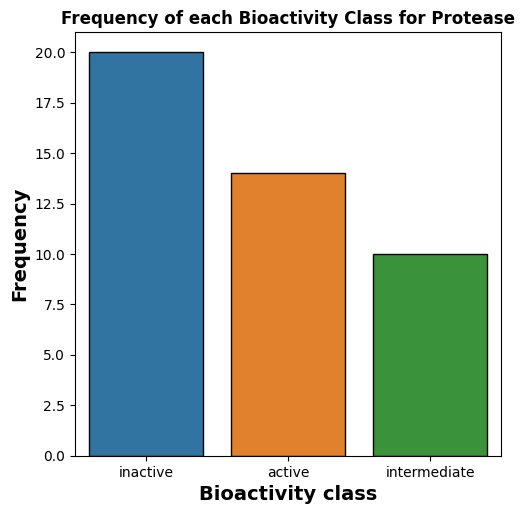

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=protease_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Frequency of each Bioactivity Class for Protease', fontweight='bold')

Text(0.5, 1.0, 'Frequency of each Bioactivity Class for CCR5')

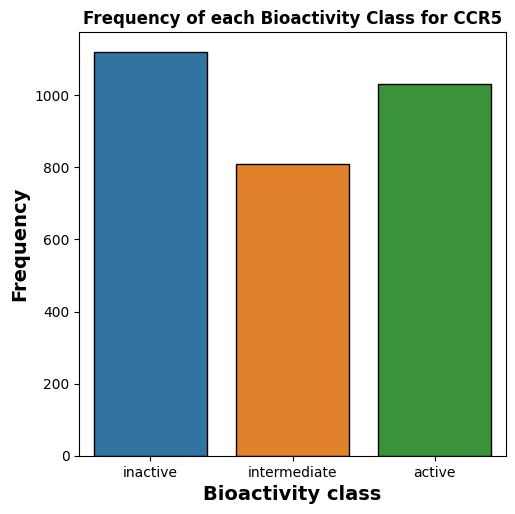

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=ccr5_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Frequency of each Bioactivity Class for CCR5', fontweight='bold')

Text(0.5, 1.0, 'Frequency of each Bioactivity Class for KAT5')

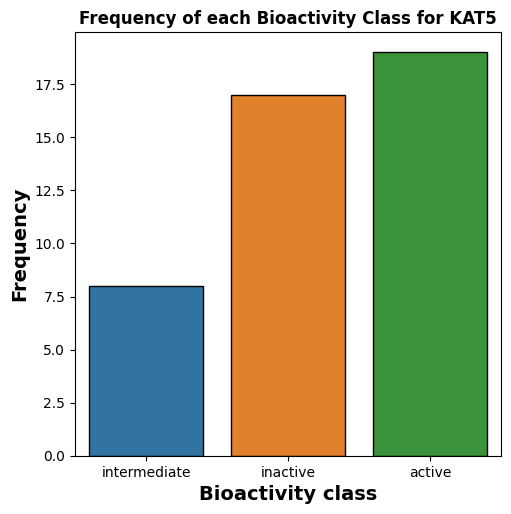

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=kat5_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Frequency of each Bioactivity Class for KAT5', fontweight='bold')

### Box Plots of Lipinski Descriptors for Each 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6035b11-f7b4-4c22-8497-513296c81550' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>